In [2]:
import pandas as pd

df = pd.read_excel("../data/raw/customer_churn.xlsx.xlsx")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [3]:
df.shape
df.columns.tolist()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'numAdminTickets',
 'numTechTickets',
 'Churn']

In [4]:
df.shape


(7043, 23)

In [5]:
df["Churn"].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [6]:
df.groupby("Churn")["tenure"].mean()


Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [7]:
df.groupby("Churn")[["numAdminTickets", "numTechTickets"]].mean()


,numAdminTickets,numTechTickets
Churn,,
No,0.530924,0.151140
Yes,0.473515,1.162654


In [8]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)


Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

In [9]:
df.groupby("Churn")[["MonthlyCharges"]].mean()


,MonthlyCharges
Churn,
No,61.265124
Yes,74.441332


In [10]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [11]:
# =========================
# Feature Engineering
# =========================

# Variable objetivo
y = df["Churn"].map({"Yes": 1, "No": 0})

# Quitamos ID
X = df.drop(columns=["Churn", "customerID"])

X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0


In [12]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# --- CARGAR DATOS ---
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn'].map({'No':0, 'Yes':1})  # convertir a 0/1

# --- LIMPIAR COLUMNAS NUMÉRICAS ---
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']

for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # convierte a número, errores -> NaN

# Reemplazar NaN con la media de la columna
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())

# --- COLUMNAS CATEGÓRICAS ---
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# --- PREPROCESAMIENTO ---
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# --- PIPELINE COMPLETO ---
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# --- DIVIDIR DATOS ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- ENTRENAR MODELO ---
pipeline.fit(X_train, y_train)

# --- EVALUACIÓN RÁPIDA ---
score = pipeline.score(X_test, y_test)
print(f"Exactitud en test: {score:.4f}")


Exactitud en test: 0.8581


# Modelo Lineal (Regresión logística)

Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.89      0.92      0.91      1035
       Churn       0.76      0.68      0.72       374

    accuracy                           0.86      1409
   macro avg       0.82      0.80      0.81      1409
weighted avg       0.85      0.86      0.86      1409

   Cliente  Probabilidad_Churn
0      437            0.000149
1     2280            0.620994
2     2235            0.006853
3     4460            0.297254
4     3761            0.000182


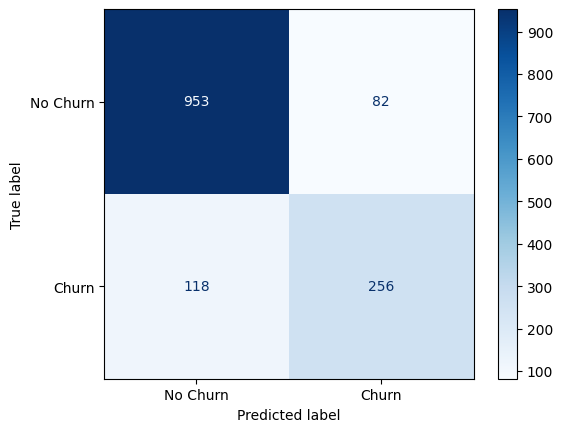

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# --- Predicciones ---
y_pred = pipeline.predict(X_test)            # predicciones binarias (0 o 1)
y_proba = pipeline.predict_proba(X_test)[:,1]  # probabilidad de churn = 1

# --- Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')

# --- Precisión, Recall, F1 ---
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# --- Probabilidad de que se vaya cada cliente ---
prob_df = pd.DataFrame({'Cliente': X_test.index, 'Probabilidad_Churn': y_proba})
print(prob_df.head())


In [14]:
# --- DATAFRAME CON RIESGO DE CHURN ---
clientes_riesgo = X_test.copy()

clientes_riesgo['Probabilidad_Churn'] = y_proba
clientes_riesgo['Churn_Real'] = y_test.values

# Clasificar riesgo
def clasificar_riesgo(p):
    if p >= 0.5:
        return 'ALTO'
    elif p >= 0.2:
        return 'MEDIO'
    else:
        return 'BAJO'

clientes_riesgo['Nivel_Riesgo'] = clientes_riesgo['Probabilidad_Churn'].apply(clasificar_riesgo)

# Ordenar por mayor riesgo
clientes_riesgo_ordenados = clientes_riesgo.sort_values(
    by='Probabilidad_Churn', ascending=False
)

# Mostrar los clientes más críticos
clientes_riesgo_ordenados[['Probabilidad_Churn', 'Nivel_Riesgo']].head(20)


,Probabilidad_Churn,Nivel_Riesgo
2877,0.999174,ALTO
4792,0.996099,ALTO
2012,0.993747,ALTO
3047,0.991646,ALTO
402,0.991455,ALTO
1171,0.989989,ALTO
2798,0.989754,ALTO
6593,0.988239,ALTO
2206,0.987218,ALTO
4594,0.986421,ALTO


In [15]:
clientes_riesgo['Nivel_Riesgo'].value_counts()


Nivel_Riesgo
BAJO     830
ALTO     338
MEDIO    241
Name: count, dtype: int64

In [16]:
clientes_riesgo[clientes_riesgo['Nivel_Riesgo'] == 'MEDIO'] \
    .sort_values('Probabilidad_Churn', ascending=False) \
    .head(10)[['Probabilidad_Churn', 'Nivel_Riesgo']]


,Probabilidad_Churn,Nivel_Riesgo
6345,0.499954,MEDIO
3767,0.499116,MEDIO
3065,0.498641,MEDIO
1549,0.498468,MEDIO
2319,0.497403,MEDIO
2139,0.497246,MEDIO
1834,0.495618,MEDIO
5536,0.495608,MEDIO
1926,0.493723,MEDIO
3565,0.493135,MEDIO


In [17]:
clientes_riesgo[clientes_riesgo['Nivel_Riesgo'] == 'BAJO'] \
    .sort_values('Probabilidad_Churn', ascending=True) \
    .head(10)[['Probabilidad_Churn', 'Nivel_Riesgo']]


,Probabilidad_Churn,Nivel_Riesgo
6735,0.000053,BAJO
6182,0.000068,BAJO
849,0.000071,BAJO
2983,0.000072,BAJO
6659,0.000072,BAJO
6097,0.000075,BAJO
4216,0.000077,BAJO
968,0.000081,BAJO
5344,0.000083,BAJO
1377,0.000085,BAJO


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Nuevo pipeline con Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])

# Entrenar
pipeline_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = pipeline_rf.predict(X_test)
y_proba_rf = pipeline_rf.predict_proba(X_test)[:,1]

# Evaluación
print("=== RANDOM FOREST ===")
print(classification_report(y_test, y_pred_rf))


=== RANDOM FOREST ===
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1035
           1       0.73      0.62      0.67       374

    accuracy                           0.84      1409
   macro avg       0.80      0.77      0.78      1409
weighted avg       0.83      0.84      0.83      1409



# Random Forest
# Usa muchos árboles de decisión.
# Para este caso funciona un poco peor que el modelo de regresión logística 

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Probabilidades de churn
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Nuevo threshold
threshold = 0.4

# Nuevas predicciones
y_pred_new = (y_proba >= threshold).astype(int)

print("=== THRESHOLD 0.4 ===")
print(classification_report(y_test, y_pred_new))


=== THRESHOLD 0.4 ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1035
           1       0.71      0.76      0.74       374

    accuracy                           0.85      1409
   macro avg       0.81      0.83      0.82      1409
weighted avg       0.86      0.85      0.86      1409



# Threshold = regla de decisión
## Usamos el modelo de regresión logística ya que fue el que mejor funcionio, aqui lo que hicimos fue hacer que el modelo tome a los clientes que tienen 0.4 probabilidad de hacer churn como probabilidad alta, por ende sin mejoramos la estrategia de decisión 

In [22]:
threshold = 0.3
y_pred_new = (y_proba >= threshold).astype(int)

print("=== THRESHOLD 0.3 ===")
print(classification_report(y_test, y_pred_new))


=== THRESHOLD 0.3 ===
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1035
           1       0.65      0.84      0.73       374

    accuracy                           0.84      1409
   macro avg       0.79      0.84      0.81      1409
weighted avg       0.86      0.84      0.84      1409



## GridSearch
C → qué tan fuerte es la regularización

penalty → tipo de regularización

GridSearch prueba múltiples combinaciones

In [23]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros a probar
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# Crear GridSearch
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',   # importante: optimizamos recall
    n_jobs=-1
)

# Entrenar
grid_search.fit(X_train, y_train)

print("Mejor parámetro encontrado:")
print(grid_search.best_params_)

print("Mejor score (recall promedio en CV):")
print(grid_search.best_score_)


Mejor parámetro encontrado:
{'classifier__C': 100}
Mejor score (recall promedio en CV):
0.7137123745819398


In [24]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report

print("=== MODELO OPTIMIZADO ===")
print(classification_report(y_test, y_pred_best))


=== MODELO OPTIMIZADO ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1035
           1       0.75      0.68      0.71       374

    accuracy                           0.85      1409
   macro avg       0.82      0.80      0.81      1409
weighted avg       0.85      0.85      0.85      1409



In [25]:
y_proba_best = best_model.predict_proba(X_test)[:, 1]

threshold = 0.4
y_pred_best_custom = (y_proba_best >= threshold).astype(int)

print("=== MODELO OPTIMIZADO + THRESHOLD 0.4 ===")
print(classification_report(y_test, y_pred_best_custom))


=== MODELO OPTIMIZADO + THRESHOLD 0.4 ===
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1035
           1       0.71      0.78      0.74       374

    accuracy                           0.86      1409
   macro avg       0.81      0.83      0.82      1409
weighted avg       0.86      0.86      0.86      1409



# Curva ROC y AUC

ROC = Receiver Operating Characteristic
En el gráfico:
Eje X → False Positive Rate (FPR)
Eje Y → True Positive Rate (Recall)
Cada punto del gráfico es un threshold diferente.

AUC = Area Under the Curve
0.5 → modelo aleatorio
0.7 → aceptable
0.8 → bueno
0.9 → excelente
1.0 → perfecto
Mientras más cerca de 1, mejor separa churn vs no churn.

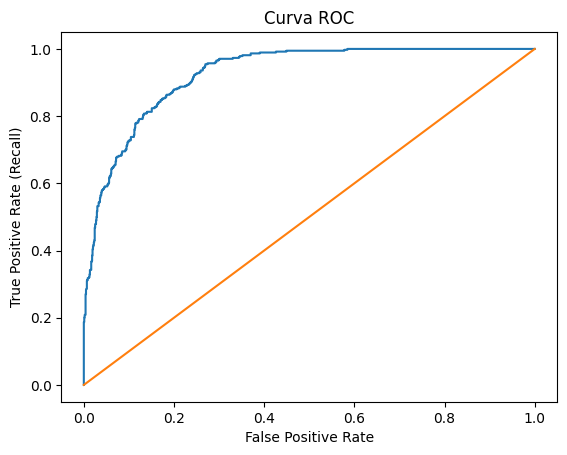

AUC: 0.9257433671755924


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_proba)

# Graficar
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])  # línea aleatoria
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC")
plt.show()

print("AUC:", auc_score)
